<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Clustering%20Algorithms/DBSCAN%20Clustering/dbscan_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN from Scratch (No Libraries, No Classes)

In this notebook, we implement **DBSCAN**, a powerful clustering algorithm that finds clusters of **arbitrary shapes** and identifies **outliers (noise)** automatically.

## What is DBSCAN?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points that are closely packed together and marks points that lie alone in low-density regions as outliers.

### Key Parameters
- `eps` - Radius to search neighbors
- `min_samples` - Minimum points required to form a dense region

### Point Categories
- **Core Point**: Has at least `min_samples` within `eps` radius
- **Border Point**: Not a core point, but within `eps` of a core point
- **Noise**: Neither core nor border


## Sample Data




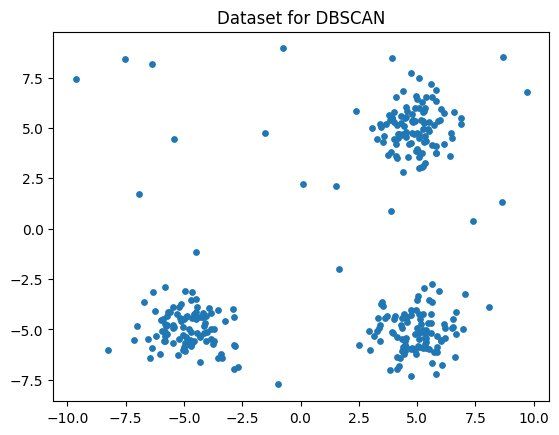

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create 2D data: 3 blobs + noise
np.random.seed(42)
blob1 = np.random.randn(100, 2) + np.array([5, 5])
blob2 = np.random.randn(100, 2) + np.array([-5, -5])
blob3 = np.random.randn(100, 2) + np.array([5, -5])
noise = np.random.uniform(-10, 10, (20, 2))

X = np.vstack((blob1, blob2, blob3, noise))

plt.scatter(X[:, 0], X[:, 1], s=15)
plt.title("Dataset for DBSCAN")
plt.show()

## DBSCAN Helper Functions

In [2]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(X.shape[0]):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

## Full DBSCAN Algorithm

In [3]:
def dbscan(X, eps, min_samples):
    n = X.shape[0]
    labels = [-1] * n  # Start with all points as noise (-1)
    visited = [False] * n
    cluster_id = 0

    for point_idx in range(n):
        if visited[point_idx]:
            continue

        visited[point_idx] = True
        neighbors = region_query(X, point_idx, eps)

        if len(neighbors) < min_samples:
            labels[point_idx] = -1  # Noise
        else:
            # Start a new cluster
            labels[point_idx] = cluster_id
            i = 0
            while i < len(neighbors):
                neighbor_idx = neighbors[i]
                if not visited[neighbor_idx]:
                    visited[neighbor_idx] = True
                    new_neighbors = region_query(X, neighbor_idx, eps)
                    if len(new_neighbors) >= min_samples:
                        neighbors += new_neighbors  # Expand cluster

                if labels[neighbor_idx] == -1:
                    labels[neighbor_idx] = cluster_id  # Reassign noise to cluster

                if labels[neighbor_idx] is None:
                    labels[neighbor_idx] = cluster_id

                i += 1

            cluster_id += 1

    return np.array(labels)


## Run + Visualize

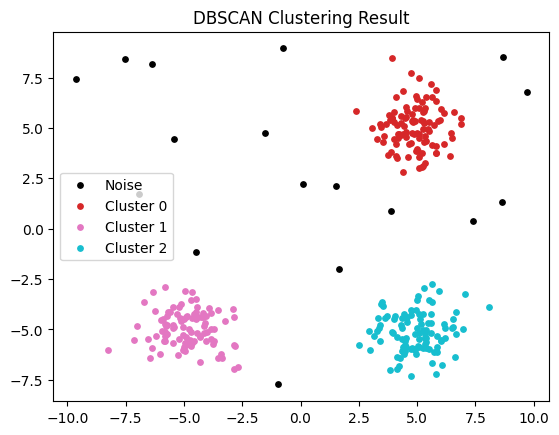

In [4]:
eps = 1.5
min_samples = 5
labels = dbscan(X, eps=eps, min_samples=min_samples)

# Plot
unique_labels = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    if label == -1:
        color = 'k'
        label_name = 'Noise'
    else:
        color = colors[i]
        label_name = f'Cluster {label}'

    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=15, label=label_name, color=color)

plt.title("DBSCAN Clustering Result")
plt.legend()
plt.show()

## Summary

- Implemented **DBSCAN** from scratch using NumPy
- Learned how to group points based on density and identify outliers
- DBSCAN automatically detects cluster count and works with irregular shapes
